#                                     Data Mining-Bil 366 Final Ödevi

        
    
Tevfik Gürhan Kuraş-19120205062
Yusuf Serdar Yazıcıoğlu-19120205022
Orhan Gökberk Ünal-19120205041


Konu: Türkiye'deki şehirlerin popülasyonunun Covid-19 döneminde toplu taşıma istasyonlarına gidişlerdeki etkisi

# Giriş

2020 yılındaki hareketlilik datasından spesifik olarak toplu taşıma istasyonlarındaki hareketlilik datası kullanıldı. Türkiye'deki şehirler, kümeleme (clustering) algoritmalarından biri olan K-means algoritması ile kümelendi. Bu kümelerden analiz sonucu elde edilen bilgilerle şehrin nüfusunun toplu taşıma kullanma oranı üzerinde etkisinin olup olmadığı incelendi.


Aşağıda 2020 yılı Google'ın sağladığı Türkiye Covid-19 Mobility datası, pandas kütüphanesi kullanılarak okunmuştur.

In [1]:
import pandas as pd

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

url = 'https://drive.google.com/file/d/1jowJRBc60-SioTWvEgNUv8FxEF8juOk8/view?usp=sharing'
generalurl2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()

general_df20 = pd.read_csv(generalurl2020)
general_df20.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

Aşağıda 2020 yılı Türkiye hareketlilik datası aylara göre gruplanmıştır.

In [2]:
df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
mean_df20=df20.groupby([df20.index.month])#.mean()

Aşağıda TÜİK'in sunduğu Türkiye'nin nüfus bilgileri pandas kütüphanesi kullanılarak okunmuştur. 

In [3]:
#https://data.tuik.gov.tr/Bulten/Index?p=Adrese-Dayali-Nufus-Kayit-Sistemi-Sonuclari-2020-37210
url = 'https://drive.google.com/file/d/1UKaXY9ynV2v4kvVGnQpF7s0tqgwhYup1/view?usp=sharing'
tr_population_data_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

tr_population_data=pd.read_csv(tr_population_data_url)

tr_population_data.info()

url = 'https://drive.google.com/file/d/1gl0z5TSjONyMPvWJJWVyVwOLomPEKc9z/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

tr_city_plates = pd.read_csv(url)

tr_city_plates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        81 non-null     object
 1   population  81 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   plate   81 non-null     int64 
 1   city    81 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


Aşağıda 2020 yılı Türkiye hareketlilik datasındaki toplu taşıma istasyonlarına gidişlerdeki değişimler aylara göre matplotlib kütüphanesi kullanılarak grafiğe dökülmüştür.

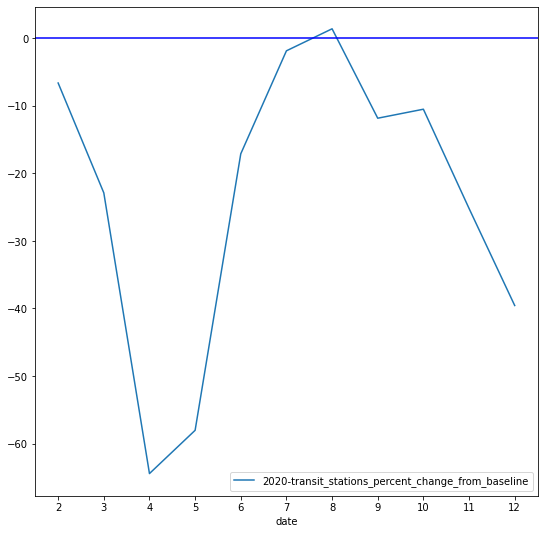

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


col_name = "transit_stations_percent_change_from_baseline"

plt.xticks( np.arange(1, 12 + 1) ) # 12 ay olarak göstermek için

mean_df20.mean()[col_name].plot( figsize=(9, 9) \
                         , y=df20[col_name] \
                         , legend=True \
                         , label = "2020-" + col_name)


plt.axhline(0, color='blue')

Aşağıda 2020 yılı Türkiye nüfus datası matplotlib kütüphanesi kullanılarak grafiğe dökülmüştür.

<AxesSubplot:xlabel='İl plaka kodu', ylabel='Popülasyon'>

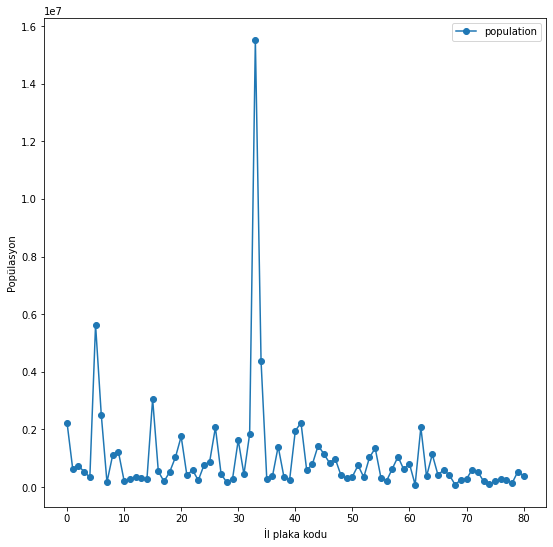

In [5]:
tr_population_data.plot( figsize=(9, 9) \
                         , marker='o'\
                         , legend=True \
                         , label = "2020-" + col_name, xlabel = "İl plaka kodu", ylabel = "Popülasyon")


Şehirleri büyük, orta ve küçük olarak kmeans kümeleme (clustering) algoritması ile kümelere ayrıldı.Ve matplotlib kütüphanesi kullanılarak grafiğe dökülmüştür.

				Cluster groups
[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 2 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]



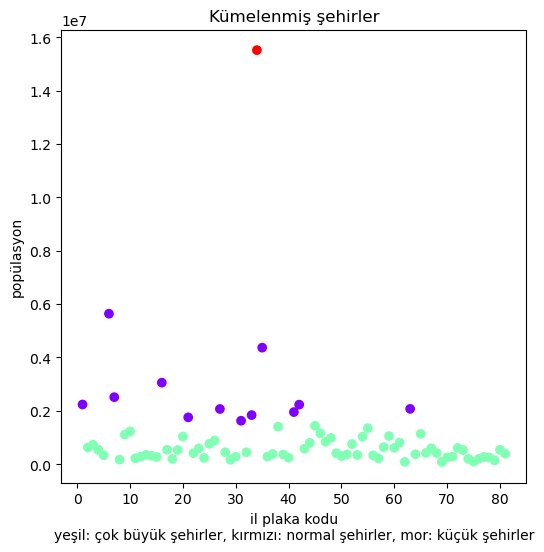

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# kmeans için datayı hazırlıyoruz
tr_population=tr_population_data.copy()
tr_population=tr_population["population"].values
tr_population=np.reshape(tr_population, (-1, 1))

# kmeans algoritmasını uyguluyoruz ve kümeliyoruz
kmeans = KMeans(3)
kmeans.fit(tr_population)
clusters = kmeans.fit_predict(tr_population)

print("\t\t\t\tCluster groups")
print(str(clusters) + "\n")

# grafiğin güzel gözükmesi için birkaç ayar
plt.figure(figsize=(6, 6), dpi=100)

plt.scatter(np.arange(1, 81 + 1), tr_population_data['population'], c=clusters, cmap='rainbow')

plt.title("Kümelenmiş şehirler")
plt.xlabel("il plaka kodu\nyeşil: çok büyük şehirler, kırmızı: normal şehirler, mor: küçük şehirler")
plt.ylabel("popülasyon")

# grafiği gösteriyoruz
plt.show()


### Büyük şehirler için analiz

Aşağıda büyük şehirlerdeki toplu taşıma kullanımının aylara göre değişi bulundu. Ve matplotlib kütüphanesi kullanılarak grafiğe dökülmüştür.

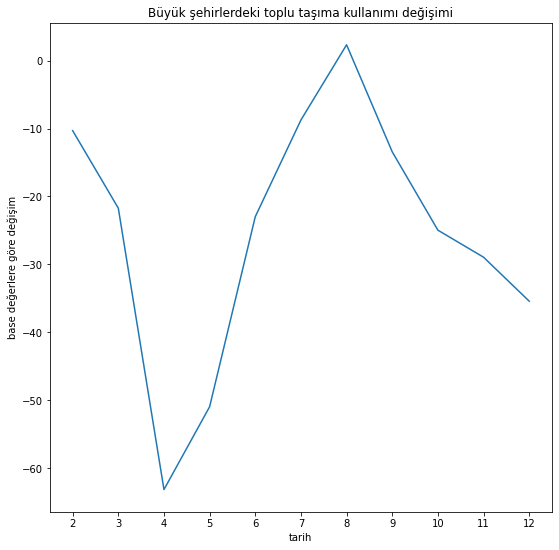

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0 -> küçük şehirler
# 2 -> normal şehirler
# 1 -> büyük şehirler

current_city = 1

df20_city_group=df20.groupby([df20["sub_region_1"]]) # bütün şehirleri grupluyoruz

sehirler = []

# group -> city
for group, val in df20_city_group:

    city_index = tr_city_plates.loc[tr_city_plates["city"] == group]["plate"]
        
    if city_index.size > 0 and clusters[city_index.iloc[0] - 1] == current_city: # eğer büyük şehirse
        sehirler.append(val)
    
    
sehirler[0].index = pd.to_datetime(sehirler[0]['date'], format='%Y-%m-%d')
sehirler_month=sehirler[0].groupby([sehirler[0].index.month]).mean()

nihai_df = sehirler_month
    
for i in range(1, len(sehirler), 1):
    sehirler[i].index = pd.to_datetime(sehirler[i]['date'], format='%Y-%m-%d')
    sehirler_month=sehirler[i].groupby([sehirler[i].index.month]).mean()
    nihai_df.append( sehirler_month )


plt.xticks(np.arange(1, 12 + 1))
nihai_df[col_name].plot(figsize=(9, 9), title="Büyük şehirlerdeki toplu taşıma kullanımı değişimi", xlabel="tarih", ylabel="base değerlere göre değişim")

buyuk_sehirler=nihai_df[col_name].copy()


### Orta şehirler için analiz

Aşağıda orta şehirlerdeki toplu taşıma kullanımının aylara göre değişi bulundu. Ve matplotlib kütüphanesi kullanılarak grafiğe dökülmüştür.

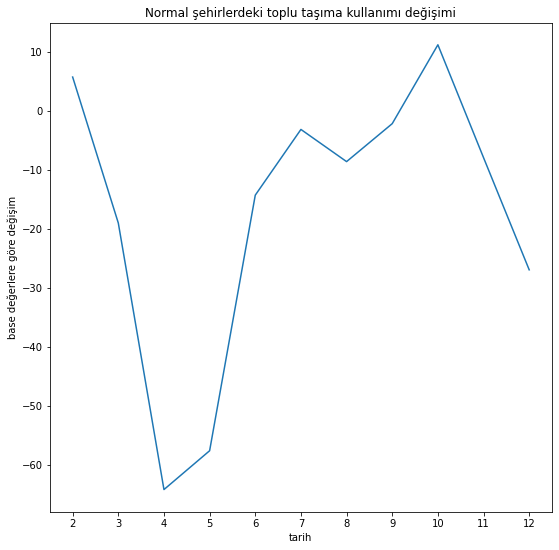

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0 -> küçük şehirler
# 2 -> normal şehirler
# 1 -> büyük şehirler

current_city = 2

df20_city_group=df20.groupby([df20["sub_region_1"]]) # bütün şehirleri grupluyoruz

sehirler = []

# group -> city
for group, val in df20_city_group:

    city_index = tr_city_plates.loc[tr_city_plates["city"] == group]["plate"]
        
    if city_index.size > 0 and clusters[city_index.iloc[0] - 1] == current_city: # eğer büyük şehirse
        sehirler.append(val)
    
    
sehirler[0].index = pd.to_datetime(sehirler[0]['date'], format='%Y-%m-%d')
sehirler_month=sehirler[0].groupby([sehirler[0].index.month]).mean()

nihai_df = sehirler_month
    
for i in range(1, len(sehirler), 1):
    sehirler[i].index = pd.to_datetime(sehirler[i]['date'], format='%Y-%m-%d')
    sehirler_month=sehirler[i].groupby([sehirler[i].index.month]).mean()
    nihai_df.append( sehirler_month )

plt.xticks(np.arange(1, 12 + 1))
nihai_df[col_name].plot(figsize=(9, 9), title="Normal şehirlerdeki toplu taşıma kullanımı değişimi", xlabel="tarih", ylabel="base değerlere göre değişim")

normal_sehirler=nihai_df[col_name].copy()

### Küçük şehirler için analiz

Aşağıda küçük şehirlerdeki toplu taşıma kullanımının aylara göre değişi bulundu. Ve matplotlib kütüphanesi kullanılarak grafiğe dökülmüştür.

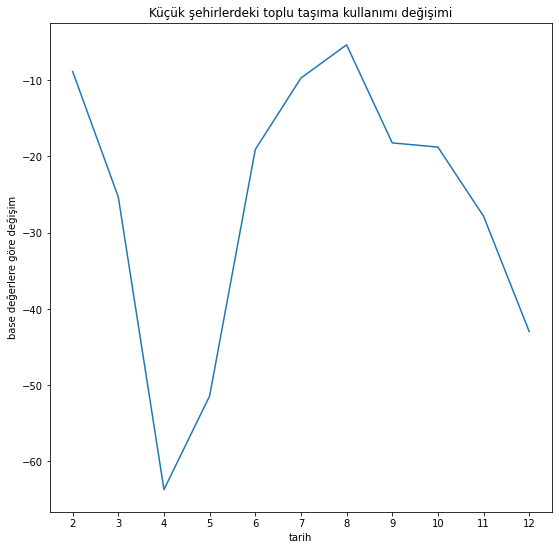

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0 -> küçük şehirler
# 2 -> normal şehirler
# 1 -> büyük şehirler

current_city = 0

df20_city_group=df20.groupby([df20["sub_region_1"]]) # bütün şehirleri grupluyoruz

sehirler = []

# group -> city
for group, val in df20_city_group:

    city_index = tr_city_plates.loc[tr_city_plates["city"] == group]["plate"]
        
    if city_index.size > 0 and clusters[city_index.iloc[0] - 1] == current_city: # eğer büyük şehirse
        sehirler.append(val)
    
    
sehirler[0].index = pd.to_datetime(sehirler[0]['date'], format='%Y-%m-%d')
sehirler_month=sehirler[0].groupby([sehirler[0].index.month]).mean()

nihai_df = sehirler_month
    
for i in range(1, len(sehirler), 1):
    sehirler[i].index = pd.to_datetime(sehirler[i]['date'], format='%Y-%m-%d')
    sehirler_month=sehirler[i].groupby([sehirler[i].index.month]).mean()
    nihai_df.append( sehirler_month )

plt.xticks(np.arange(1, 12 + 1))
nihai_df[col_name].plot(figsize=(9, 9), title="Küçük şehirlerdeki toplu taşıma kullanımı değişimi", xlabel="tarih", ylabel="base değerlere göre değişim")

kucuk_sehirler=nihai_df[col_name].copy()

### Bütün gruplardaki grafiklerin beraber analizi

Yukarıda gruplandırılmış şehirlere yapılan analizler tek bir grafik altında toplanmıştır.

<AxesSubplot:title={'center':'Şehirlerdeki toplu taşıma kullanımı değişimi'}, xlabel='tarih', ylabel='base değerlere göre değişim'>

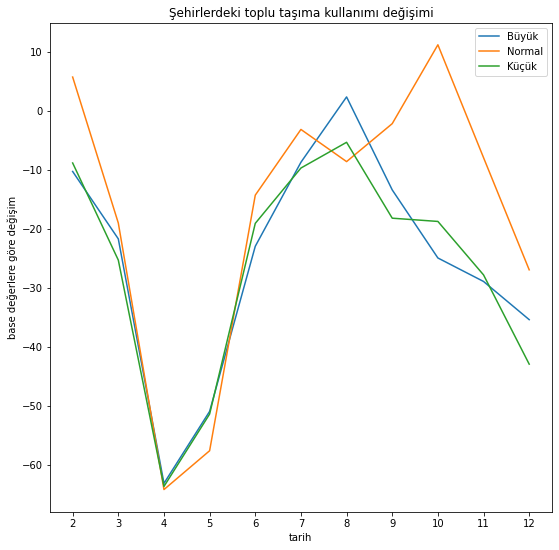

In [10]:
plt.xticks(np.arange(1, 12 + 1))

buyuk_sehirler.plot(figsize=(9, 9), title="Şehirlerdeki toplu taşıma kullanımı değişimi", xlabel="tarih", ylabel="base değerlere göre değişim", legend=True, label = "Büyük")

normal_sehirler.plot(figsize=(9, 9), title="Şehirlerdeki toplu taşıma kullanımı değişimi", xlabel="tarih", ylabel="base değerlere göre değişim", legend=True, label = "Normal")

kucuk_sehirler.plot(figsize=(9, 9), title="Şehirlerdeki toplu taşıma kullanımı değişimi", xlabel="tarih", ylabel="base değerlere göre değişim", legend=True, label = "Küçük")

### İlk Çıkarım
Şehirlerdeki Toplu Taşıma Kullanımı grafiğinde belirgin olarak iki tane peak noktası gözüküyor. Bu noktaların birincisi 2020 yılı Nisan ayında belirgin bir düşüş ve 2020 yılı Ekim ayında büyük şehirler için belirgin bir yükseliş görülmektedir. 

 İlk olarak 2020 yılı Nisan ayındaki haber bültenlerini incelediğimiz zaman sokağa çıkma yasaklarının bu dönemlerde başladığı görülmüştür.
Aşağıdaki veriler https://tr.wikipedia.org/wiki/2020%27de_Türkiye adresinden alınmıştır:
3 Nisan - COVID-19 tedbirleri kapsamında 20 yaş altına sokağa çıkma yasağı getirildi.
10 Nisan - COVID-19 pandemisi ile mücadele kapsamında 31 ilde 2 gün boyunca sokağa çıkma yasağı ilan edildi.
17 Nisan - COVID-19 pandemisi ile mücadele kapsamında 31 ilde 2. defa haftasonu sokağa çıkma yasağı ilan edildi.

 İkinci bir peak noktası 2020 yılı Ekim ayındaki haber bültenlerini incelediğimiz zaman yüz yüze eğitime kademeli olarak geçişe başlanıldığı görülmüştür.
Aşağıdaki veriler https://tr.wikipedia.org/wiki/2020%27de_Türkiye adresinden alınmıştır:
12 Ekim - Yüz yüze eğitim 2, 3, 4'üncu sınıflar ile 8'inci ve 12'nci sınıf öğrencilerini kapsayacak şekilde kademeli olarak başladı.

Yukarıdaki datada büyük şehirlerde belirgin bir peak noktası olmasının sebeplerinden biri büyük şehirlerdeki öğrenci sayısının diğer şehirlere göre daha fazla olmasıdır.



In [11]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sklearn.linear_model import LinearRegression
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.compose import make_reduction
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import seaborn as sns

Aşağıda 2020 yılı Kaggle'dan bulduğumuz Türkiye Covid-19 vaka datası, pandas kütüphanesi kullanılarak okunmuştur.

In [12]:
import os
import pandas as pd



cases_url = 'https://drive.google.com/file/d/17QSd0AU-t8LPqOpvhfwKEmptC8C9izfq/view?usp=sharing'
cases_url2020 = 'https://drive.google.com/uc?id=' + cases_url.split('/')[-2]


cases = pd.read_csv(cases_url2020)

In [13]:
cases.drop(['Province/State'],axis=1, inplace=True)

# find daily cases
cases['daily_confirmed'] = cases['Confirmed'].shift(-1) - cases['Confirmed']
cases.daily_confirmed.fillna(method='ffill', inplace=True)


cases['date'] = pd.DatetimeIndex(data=cases['Last_Update'], freq='d')

cases = cases.set_index('date')
cases_grouped=cases.groupby([cases.index.month])

Aşağıda 2020 yılı Türkiye vaka datası matplotlib kütüphanesi kullanılarak grafiğe dökülmüştür.

Text(0.5, 0.98, 'Covid-19 daily confirmed cases by month (2020)')

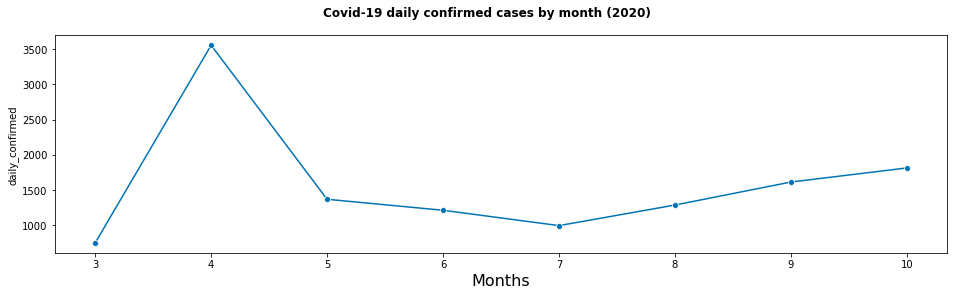

In [14]:
fig, ax = plot_series(cases_grouped.mean()['daily_confirmed'])

ax.set_xlabel('Months', fontsize=16)
fig.suptitle('Covid-19 daily confirmed cases by month (2020)', fontweight='bold')

### Aşağıda ilk olarak verilen fonksiyon sadece covid verilerinin geçmiş değerlerine göre gelecek toplu taşıma kullanımı değerlerini tahmin etmeye çalışıyor. İkinci fonksiyon ise toplu taşıma verilerinin geçmiş değerlerine göre gelecek değerlerini tahmin etmeye çalışıyor

In [15]:
def forecast_and_plot_with_exo(y, X, test_size, window_length, regressor, fig_title):
    
    sns.set(rc={'figure.figsize':(12,6)})
    y = y
    X = X
    # test ve train data olarak ikiye ayırıyoruz
    y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=test_size)
    fh_abs = ForecastingHorizon(y_test.index, is_relative=False)
    
    regressor = regressor
    forecaster = make_reduction(estimator=regressor, strategy='recursive', window_length=window_length)

    forecaster.fit(y_train, X_train)
    y_pred = forecaster.predict(X=X_test, fh=fh_abs)

    fig, ax = plot_series(y_train, y_test, y_pred, labels=["train", "test", "pred"])
    fig.suptitle(fig_title, fontweight='bold')
    print(f"{fig_title} \nerror:{mean_absolute_percentage_error(y_test, y_pred)}")

def forecast_and_plot(y, test_size, window_length, regressor, fig_title):
    sns.set(rc={'figure.figsize':(12,6)})
    y = y
    
    y_train, y_test = temporal_train_test_split(y, test_size=test_size)
    fh_abs = ForecastingHorizon(y_test.index, is_relative=False)
    
    regressor = regressor
    forecaster = make_reduction(estimator=regressor, strategy='recursive', window_length=window_length)

    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh=fh_abs)

    fig, ax = plot_series(y_train, y_test, y_pred, labels=["train", "test", "pred"])
    fig.suptitle(fig_title, fontweight='bold')
    print(f"{fig_title} \nerror:{mean_absolute_percentage_error(y_test, y_pred)}")

Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(SVR)) 
error:2.0
Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(RandomForestRegressor)) 
error:2.0
Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(SVR)) 
error:2.0
Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(RandomForestRegressor)) 
error:2.0


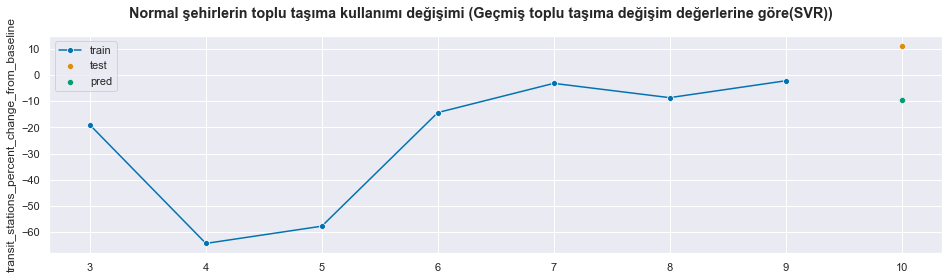

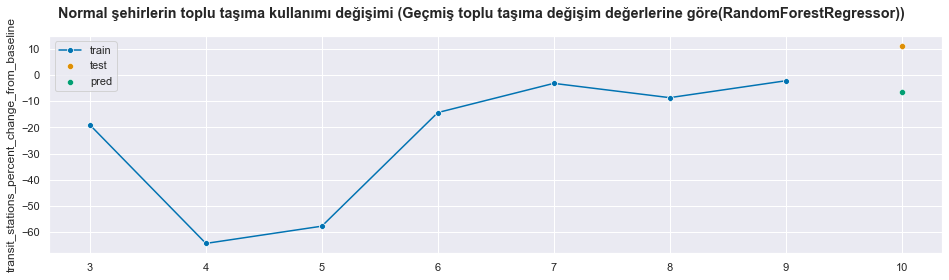

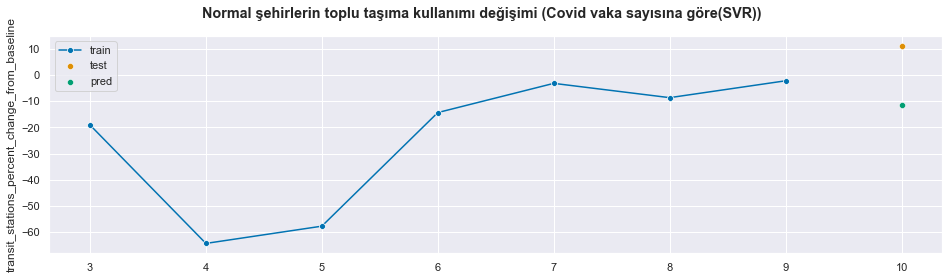

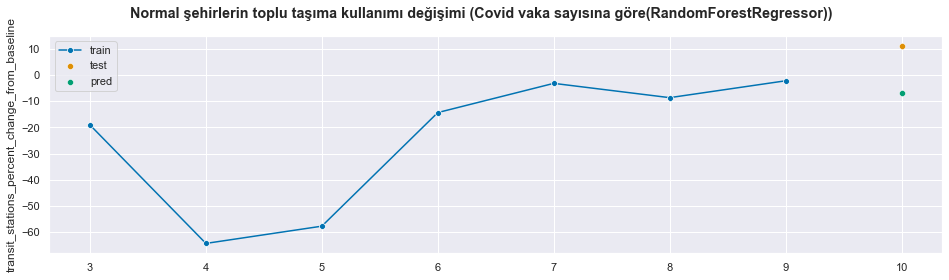

In [16]:
from sklearn.ensemble import RandomForestRegressor
test_size = 1
window_length = 1


forecast_and_plot(y=normal_sehirler.iloc[1:9],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=SVR(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(SVR))"
                 )
forecast_and_plot(y=normal_sehirler.iloc[1:9],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=RandomForestRegressor(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(RandomForestRegressor))"
                 )
forecast_and_plot_with_exo(y=normal_sehirler.iloc[1:9],
                  X=cases_grouped.mean()['daily_confirmed'],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=SVR(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(SVR))"
                 )
forecast_and_plot_with_exo(y=normal_sehirler.iloc[1:9],
                  X=cases_grouped.mean()['daily_confirmed'],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=RandomForestRegressor(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(RandomForestRegressor))"
                 )

### Bu sefer bir sonraki üç tane değeri tahmin etmeye çalıştık.

Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(SVR)) 
error:1.3206398343707988
Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(RandomForestRegressor)) 
error:1.573903688185826
Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(SVR)) 
error:1.3134209541014552
Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(RandomForestRegressor)) 
error:1.5236994155497021



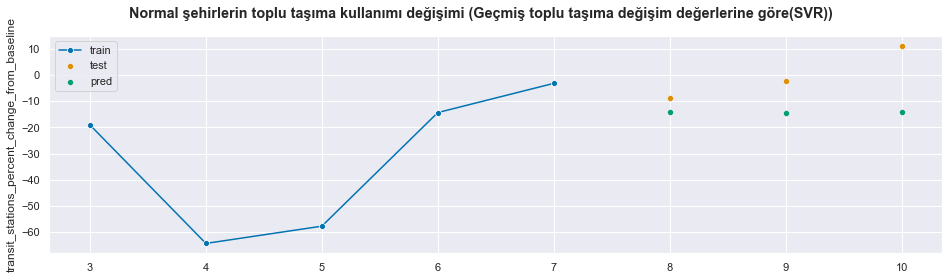

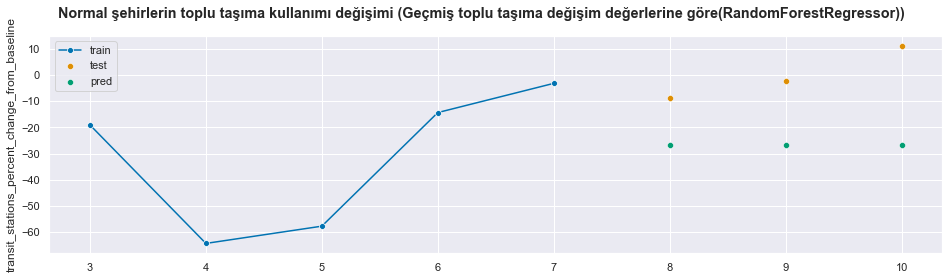

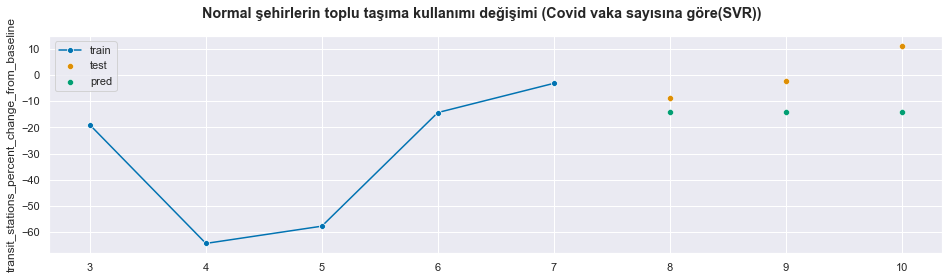

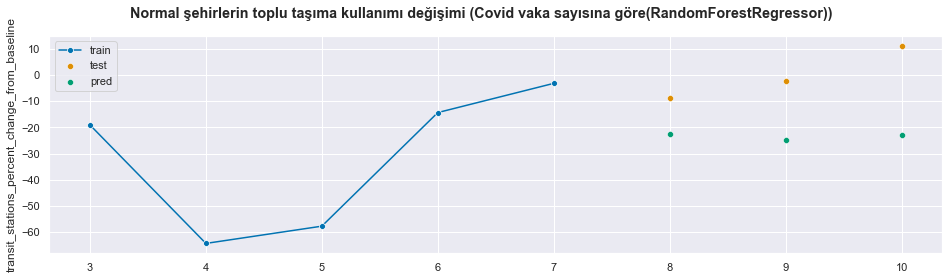

In [17]:
from sklearn.ensemble import RandomForestRegressor
test_size = 3
window_length = 2


forecast_and_plot(y=normal_sehirler.iloc[1:9],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=SVR(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(SVR))"
                 )
forecast_and_plot(y=normal_sehirler.iloc[1:9],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=RandomForestRegressor(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Geçmiş toplu taşıma değişim değerlerine göre(RandomForestRegressor))"
                 )
forecast_and_plot_with_exo(y=normal_sehirler.iloc[1:9],
                  X=cases_grouped.mean()['daily_confirmed'],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=SVR(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(SVR))"
                 )

forecast_and_plot_with_exo(y=normal_sehirler.iloc[1:9],
                  X=cases_grouped.mean()['daily_confirmed'],
                  test_size=test_size,
                  window_length=window_length,
                  regressor=RandomForestRegressor(),
                  fig_title="Normal şehirlerin toplu taşıma kullanımı değişimi (Covid vaka sayısına göre(RandomForestRegressor))"
                 )
print()

### NaiveForecaster

1.0516868005403321


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='transit_stations_percent_change_from_baseline'>)

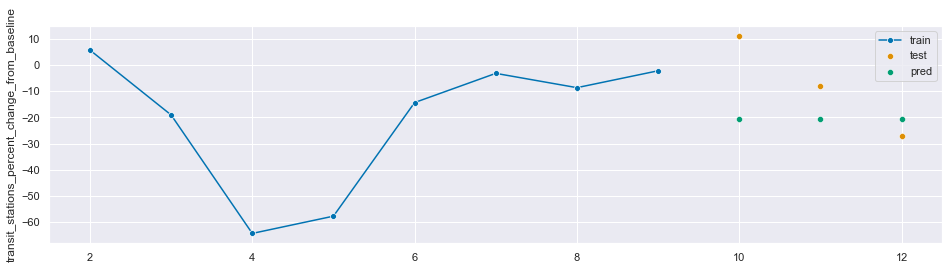

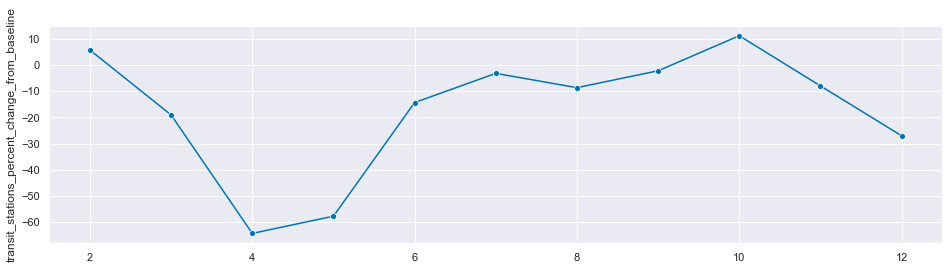

In [18]:
sns.set(rc={'figure.figsize':(12,6)})
y = normal_sehirler
y_train, y_test = temporal_train_test_split(y)

forecaster = NaiveForecaster(strategy="mean")
forecaster.fit(y_train)
y_pred = forecaster.predict(np.arange(1, y_test.size+1))
print(mean_absolute_percentage_error(y_test, y_pred))

plot_series(y_train, y_test, y_pred, labels=["train", "test", "pred"])
plot_series(y)

### İkinci Çıkarım
Forecasting içi SVR ve RandomForestRegressor kullanarak karşılaştırma yaptık. Sadece geçmiş toplu taşıma kullanımındaki değişim tahmin etmede iki farklı yol izledik. İlki sadece bu datanın geçmiş değerlerinden gelecek değerlerini tahmin etmek. İkincisi ise hem geçmiş değerlerinden hem de mevcut olan Covid vakaları datasından faydalanarak gelecek değerleri tahmin ettik.

###  Sonuç

Sonuç olarak nüfusun büyüklüğünden ziyade nüfusun çeşitliliği yani şehir içerisinde ne kadar öğrenci, çalışan ve benzeri türlerin bulunduğu toplu taşıma kullanımını etkiliyor.


### Kaynakça 

https://towardsdatascience.com/time-series-analysis-using-pandas-in-python-f726d87a97d8?gi=5cfa6c89ac8d

https://www.sktime.org/en/stable/

https://www.kaggle.com/gkhan496/covid19-in-turkey
